**[MLE-01]** 모듈을 임포트한다.

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame, Series

In [4]:
n0, mu0, variance0 = 20, [10, 11], 20
data0 = multivariate_normal(mu0, np.eye(2)*variance0 ,n0)
data0
df0 = DataFrame(data0, columns=['x1','x2'])
df0

,x1,x2
0,6.392294,12.664967
1,6.022109,14.110874
2,7.520952,5.245903
3,9.634470,12.123123
4,9.923083,12.428016
5,11.210389,4.976356
6,16.616144,12.186086
7,9.775326,17.803531
8,7.854370,14.282302
9,6.626441,14.662565


**[MLE-02]** 트레이닝 세트 데이터를 준비한다.

In [26]:
np.random.seed(20160512)

n0, mu0, variance0 = 10, [5, 6], 3
data0 = multivariate_normal(mu0, np.eye(2)*variance0 ,n0)
df0 = DataFrame(data0, columns=['x1','x2'])
df0['t'] = 0

n1, mu1, variance1 = 15, [1, 2], 2
data1 = multivariate_normal(mu1, np.eye(2)*variance1 ,n1)
df1 = DataFrame(data1, columns=['x1','x2'])
df1['t'] = 1

df = pd.concat([df0, df1], ignore_index=True)
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)

In [32]:
print(df.reindex(permutation(df.index)).reset_index(drop=True))

          x1        x2  t
0   1.522939  1.567479  1
1   4.590259  4.830701  0
2   2.500935  4.940887  0
3   3.850851  6.493310  0
4  -0.477510  0.575483  1
5   0.106064  0.112227  1
6   7.498152  4.166313  0
7   7.518957  7.427227  0
8   2.015487  1.611746  1
9   0.044695  1.108426  1
10  2.845129  4.066918  0
11  0.570064  1.545249  1
12 -1.221018  3.905991  1
13 -0.420286  4.032325  1
14  1.569683  0.763375  1
15  1.009070 -0.565796  1
16  6.625600  5.965118  0
17  6.389215  3.822238  0
18  4.677399  5.294667  0
19 -1.295065  1.550041  1
20  1.538011 -1.163311  1
21  1.419753  2.598622  1
22  1.802702  2.847633  1
23  5.037699  8.525932  0
24  1.158426  3.898184  1


In [12]:
df1

,x1,x2,t
0,0.044695,1.108426,1
1,1.158426,3.898184,1
2,1.538011,-1.163311,1
3,-0.420286,4.032325,1
4,-0.477510,0.575483,1
5,1.522939,1.567479,1
6,0.106064,0.112227,1
7,1.419753,2.598622,1
8,0.570064,1.545249,1
9,-1.295065,1.550041,1


**[MLE-03]** 트레이닝 세트 데이터의 내용을 확인한다.

In [35]:
train_set[['x1','x2']]

,x1,x2
0,5.037699,8.525932
1,4.677399,5.294667
2,6.625600,5.965118
3,6.389215,3.822238
4,-1.221018,3.905991
5,1.538011,-1.163311
6,0.570064,1.545249
7,2.015487,1.611746
8,1.158426,3.898184
9,0.106064,0.112227


**[MLE-04]** (x1, x2)와 t를 각각 모은 것을 NumPy의 array 오브젝트로 추출해둔다.

In [37]:
train_x = train_set[['x1','x2']].as_matrix()
train_t = train_set['t'].as_matrix().reshape([len(train_set), 1])
train_t

c:\users\user pc\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
c:\users\user pc\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0]], dtype=int64)

**[MLE-05]** 트레이닝 세트 데이터에 대해 t=1일 확률을 구하는 계산식 p를 준비한다.

In [38]:
x = tf.placeholder(tf.float32, [None, 2])
w = tf.Variable(tf.zeros([2, 1]))
w0 = tf.Variable(tf.zeros([1]))
f = tf.matmul(x, w) + w0
p = tf.sigmoid(f)

**[MLE-06]** 오차 함수 loss와 트레이닝 알고리즘 train_step을 정의한다.

In [40]:
t = tf.placeholder(tf.float32, [None, 1])
loss = -tf.reduce_sum(t*tf.log(p) + (1-t)*tf.log(1-p))
train_step = tf.train.AdamOptimizer().minimize(loss)

**[MLE-07]** 정답률 accuracy를 정의한다.

In [41]:
correct_prediction = tf.equal(tf.sign(p-0.5), tf.sign(t-0.5))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

**[MLE-08]** 세션을 준비하고 Variable을 초기화한다.

In [43]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

**[MLE-09]** 경사 하강법에 의한 파라미터 최적화를 20000회 반복한다.

In [44]:
i = 0
for _ in range(20000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i % 2000 == 0:
        loss_val, acc_val = sess.run(
            [loss, accuracy], feed_dict={x:train_x, t:train_t})
        print ('Step: %d, Loss: %f, Accuracy: %f'
               % (i, loss_val, acc_val))

Step: 2000, Loss: 6.196881, Accuracy: 1.000000
Step: 4000, Loss: 3.569861, Accuracy: 1.000000
Step: 6000, Loss: 2.298858, Accuracy: 1.000000
Step: 8000, Loss: 1.554407, Accuracy: 1.000000
Step: 10000, Loss: 1.070504, Accuracy: 1.000000
Step: 12000, Loss: 0.740533, Accuracy: 1.000000
Step: 14000, Loss: 0.512532, Accuracy: 1.000000
Step: 16000, Loss: 0.354986, Accuracy: 1.000000
Step: 18000, Loss: 0.246245, Accuracy: 1.000000
Step: 20000, Loss: nan, Accuracy: 0.000000


**[MLE-10]** 이 시점의 파라미터 값을 추출한다.

In [46]:
w0_val, w_val = sess.run([w0, w])
w0_val, w1_val, w2_val = w0_val[0], w_val[0][0], w_val[1][0]
print (w0_val, w1_val, w2_val)

nan nan nan


**[MLE-11]** 추출한 파라미터 값을 이용해 결과를 그래프로 출력한다.

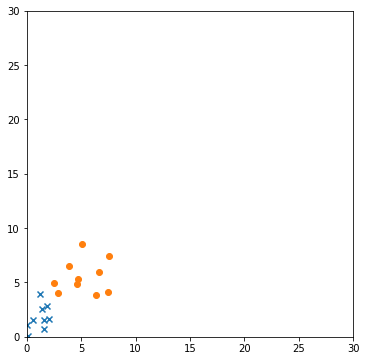

In [50]:
train_set0 = train_set[train_set['t']==0]
train_set1 = train_set[train_set['t']==1]

fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([0,30])
subplot.set_xlim([0,30])
subplot.scatter(train_set1.x1, train_set1.x2, marker='x')
subplot.scatter(train_set0.x1, train_set0.x2, marker='o')

linex = np.linspace(0,30,10)
liney = - (w1_val*linex/w2_val + w0_val/w2_val)
subplot.plot(linex, liney)

field = [[(1 / (1 + np.exp(-(w0_val + w1_val*x1 + w2_val*x2))))
          for x1 in np.linspace(0,30,100)]
         for x2 in np.linspace(0,30,100)]
subplot.imshow(field, origin='lower', extent=(0,30,0,30),
               cmap=plt.cm.gray_r, alpha=0.5)